In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import tensorflow as ts
warnings.filterwarnings('ignore')
%matplotlib inline

/home/mike/.conda/envs/tensorflow1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mike/.conda/envs/tensorflow1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mike/.conda/envs/tensorflow1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mike/.conda/envs/tensorflow1.12

In [2]:
df_train = pd.read_csv('student-por.csv', sep=';')
df_train.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
df_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Explicacion del caso de uso:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject:

31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)


In [4]:
df_train['G3'].describe()  #promedio G1 y G2

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

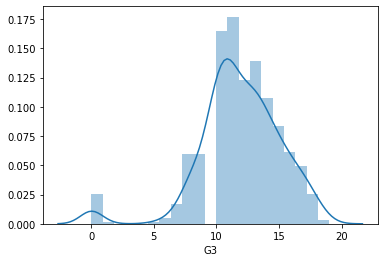

In [5]:
#Histograma G3
sns.distplot(df_train['G3']);

In [6]:
#asimetria y curtosis

print("Skewness: %f" % df_train['G3'].skew())
print("Kurtosis: %f" % df_train['G3'].kurt())

Skewness: -0.912909
Kurtosis: 2.712204


In [7]:
df_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

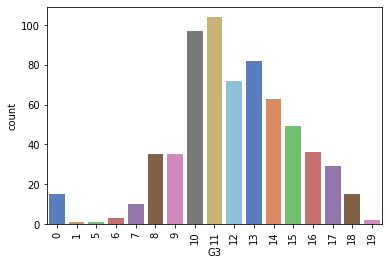

In [8]:
#Exploracion de la variable G3. La cual es la predictora de aprobación
p = sns.countplot(x="G3", data = df_train, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [9]:
#relacion con variables numericas

var = 'age'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.head(3)

,G3,age
0,11,18
1,11,17
2,12,15


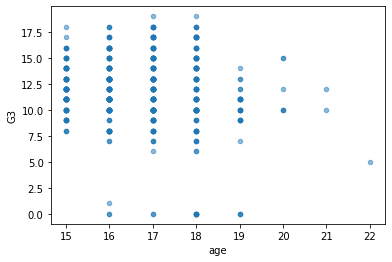

In [10]:
#diagrama dispercion G3/G1
data.plot.scatter(x=var, y='G3', alpha = 0.5);

In [11]:
var = 'traveltime'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.head(3)

,G3,traveltime
0,11,2
1,11,1
2,12,1


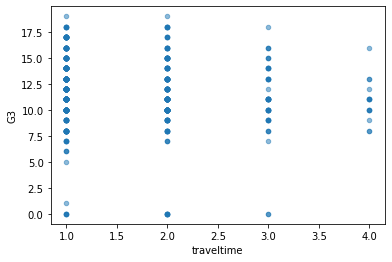

In [12]:
data.plot.scatter(x=var, y='G3', alpha = 0.5);

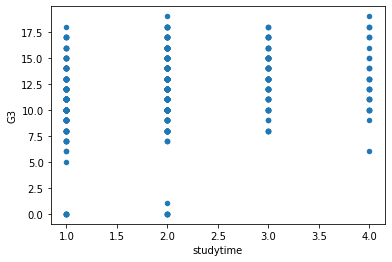

In [13]:
var = 'studytime'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='G3', alpha = 1);

In [14]:
var = 'goout'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.head(3)

,G3,goout
0,11,4
1,11,3
2,12,2


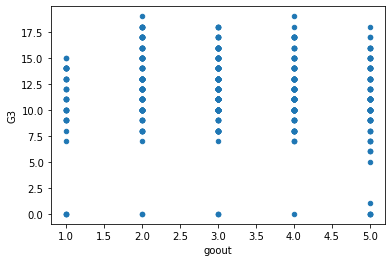

In [15]:
data.plot.scatter(x=var, y='G3', alpha = 1);

In [16]:
#la variable G1 tiene una relacion lineal con G3 debido a que G1 forma parte de la nota final G3

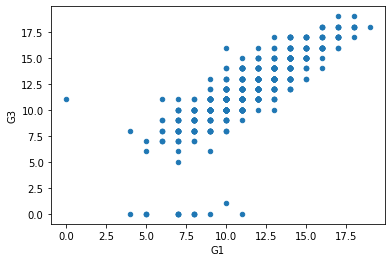

In [17]:
var = 'G1'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='G3', alpha = 1);

In [18]:
#la variable G2 también tiene una relacion lineal con G3 debido a que G2 forma parte de la nota final G3

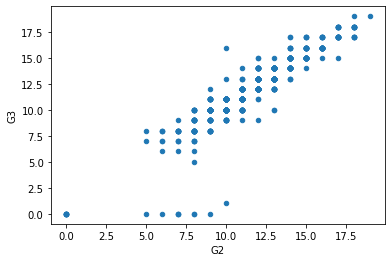

In [19]:
var = 'G2'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='G3', alpha = 1);

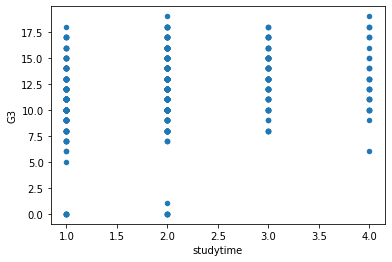

In [20]:
var = 'studytime'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='G3', alpha = 1);

In [21]:
####Relacion con variables categoricas

In [23]:
var = 'health'
df_train[var].describe()

count    649.000000
mean       3.536210
std        1.446259
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

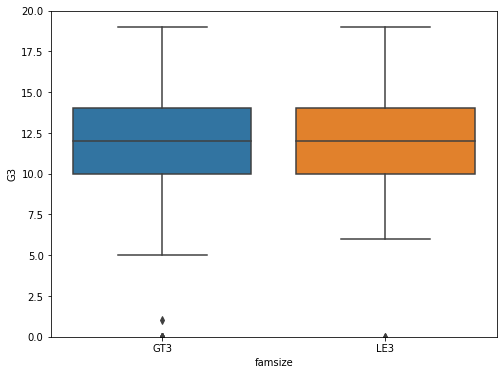

In [26]:
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);

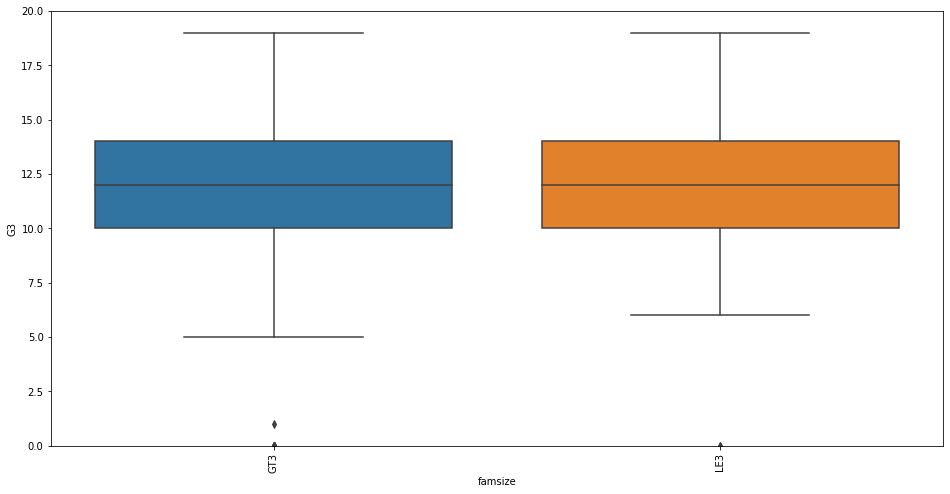

In [25]:
var = 'famsize'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

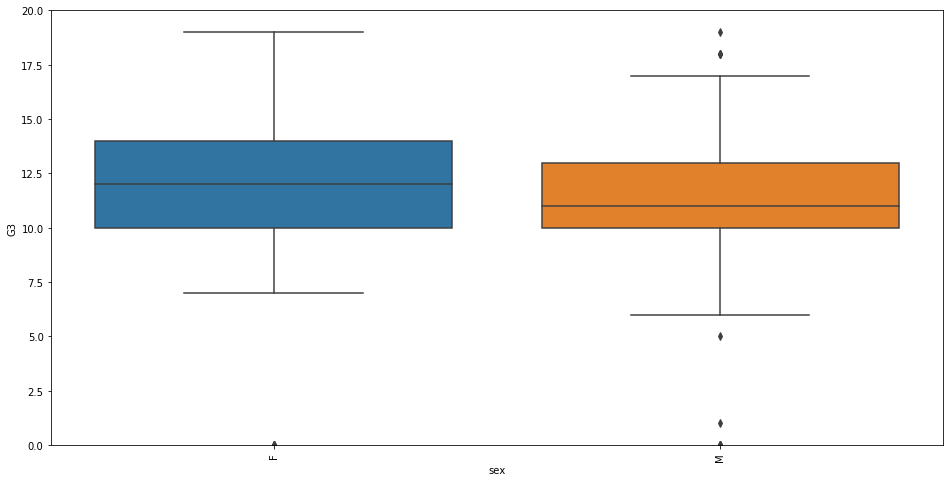

In [27]:
var = 'sex'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

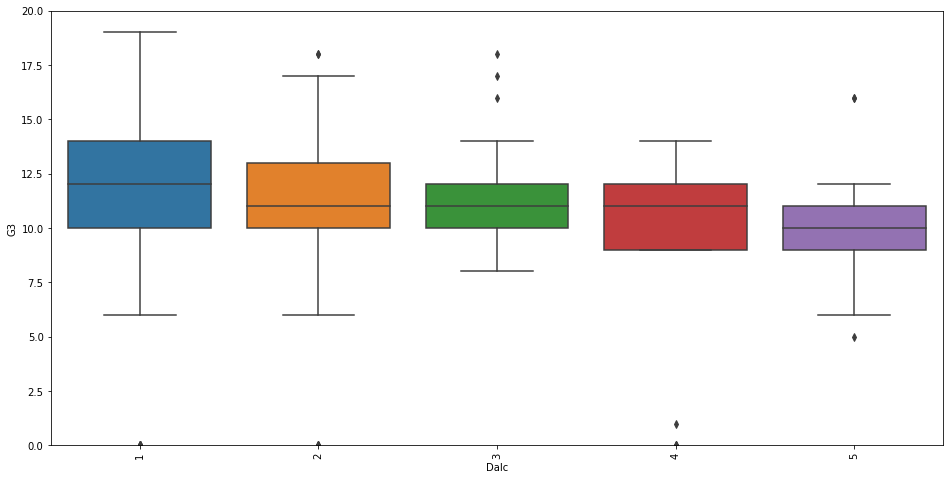

In [28]:
# Consumo de alcohol en dias de trabajo
var = 'Dalc'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

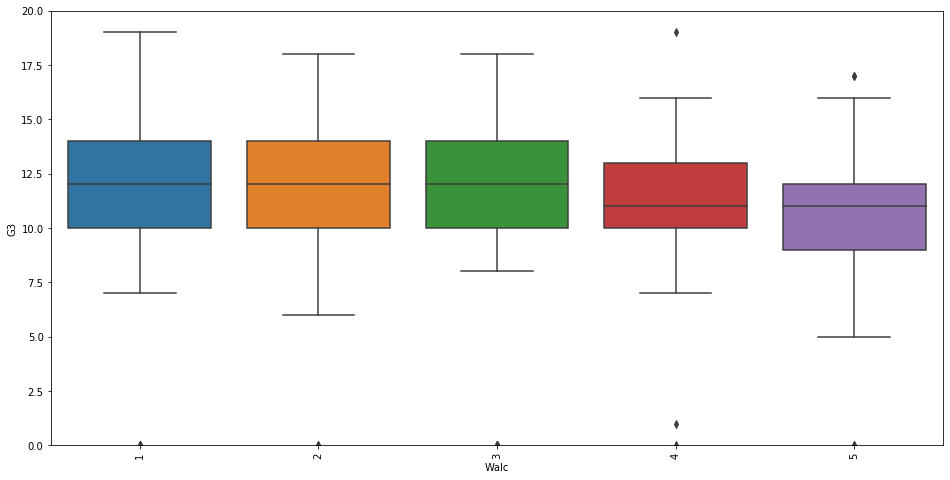

In [29]:
#consumo de alcohol en fines de semana

var = 'Walc'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

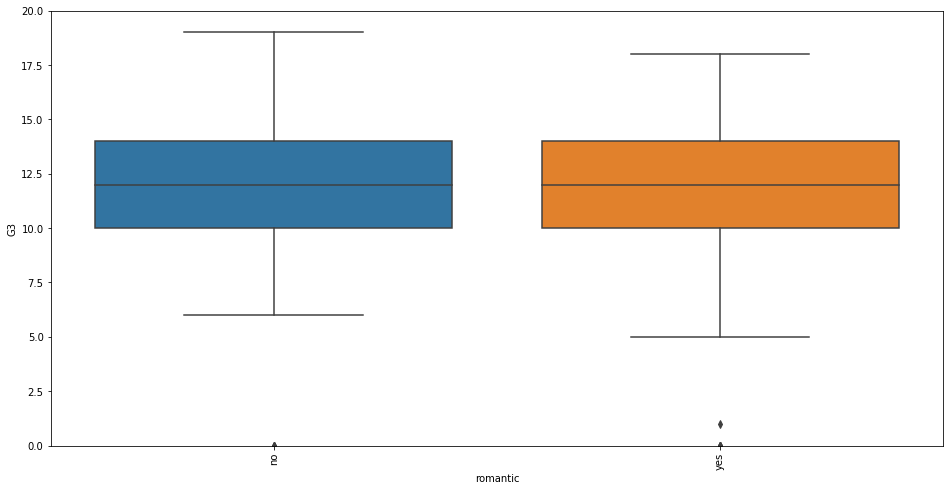

In [30]:
var = 'romantic'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

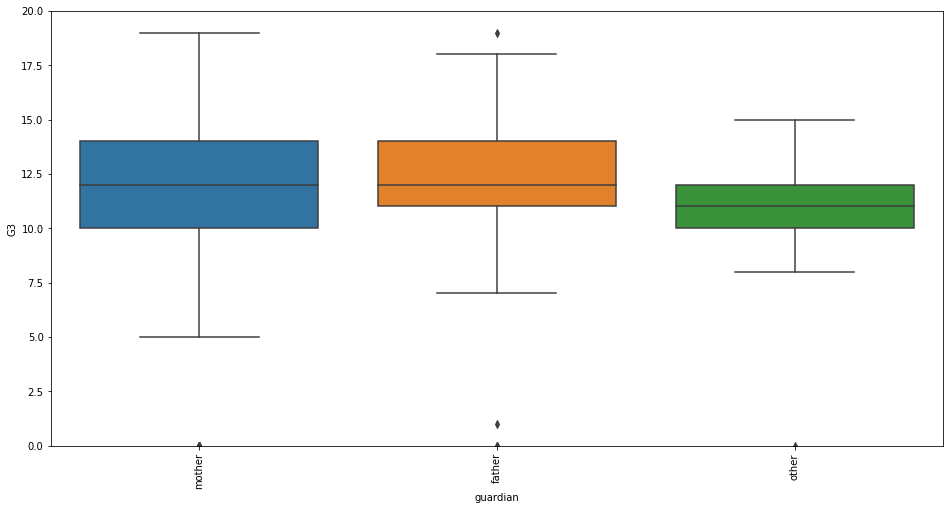

In [31]:
var = 'guardian'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

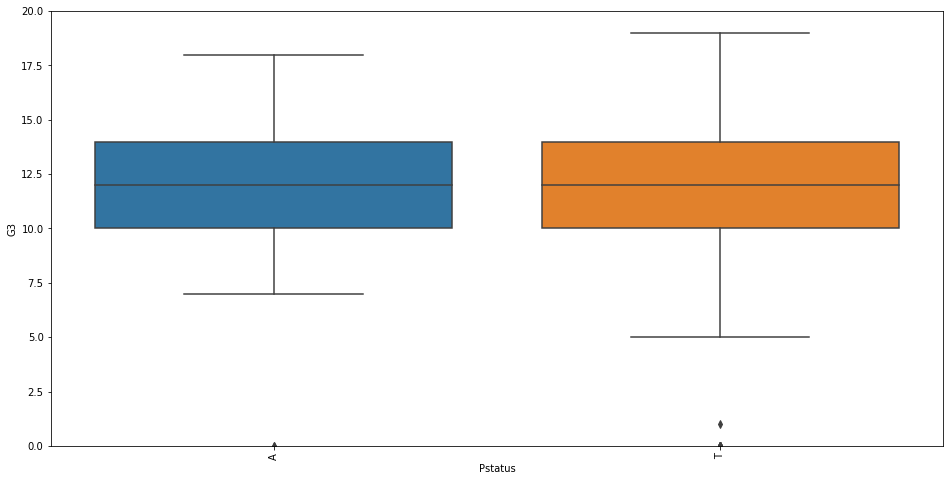

In [32]:
#El estado marital de los padres influye en cierta manera, los estudiantes que tienes los padres juntos tienen
#algunos de los mejores resultados.
var = 'Pstatus'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

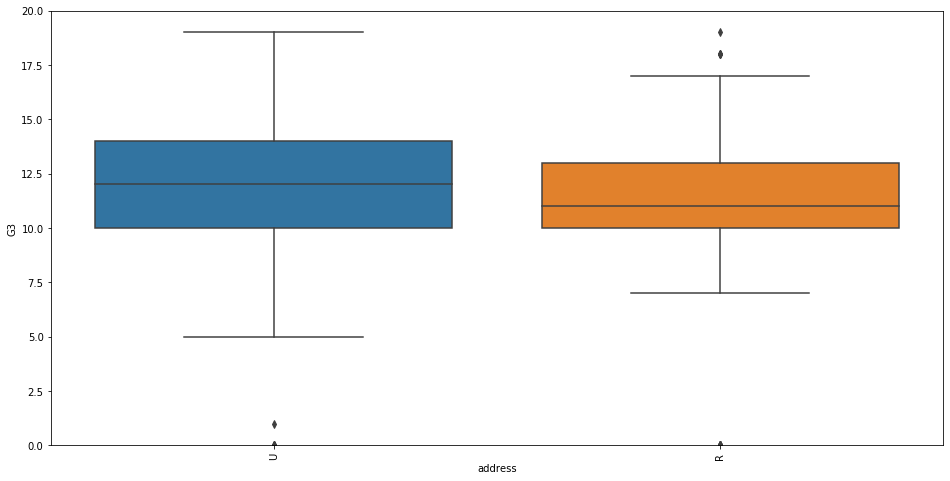

In [33]:
var = 'address'
data = pd.concat([df_train['G3'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="G3", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

In [34]:
df_train.sex[df_train.sex == 'F'] = 1
df_train.sex[df_train.sex == 'M'] = 2
df_train.internet[df_train.internet == 'no'] = 1
df_train.internet[df_train.internet == 'yes'] = 2
print(df_train.head(3)) 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   1   18       U     GT3       A     4     4  at_home  teacher  ...   
1     GP   1   17       U     GT3       T     1     1  at_home    other  ...   
2     GP   1   15       U     LE3       T     1     1  at_home    other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  

[3 rows x 33 columns]


In [35]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1,-0.107832,-0.12105,0.03449,-0.00841511,0.319968,-0.0205595,-0.00491026,0.112805,0.134768,0.0863573,-0.00875012,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1,0.647477,-0.265079,0.0970058,-0.17221,0.0244206,-0.0196863,0.00953649,-0.00701832,-0.0197658,0.00461406,-0.00857749,0.260472,0.264035,0.240151
Fedu,-0.12105,0.647477,1,-0.208288,0.0503996,-0.165915,0.0202559,0.00684063,0.0276897,6.07749e-05,0.0384447,0.0449098,0.0298587,0.217501,0.225139,0.2118
traveltime,0.03449,-0.265079,-0.208288,1,-0.0631539,0.0977298,-0.00952118,0.000936734,0.0574542,0.0928243,0.0570072,-0.0482612,-0.00814909,-0.15412,-0.154489,-0.127173
studytime,-0.00841511,0.0970058,0.0503996,-0.0631539,1,-0.147441,-0.00412713,-0.0688292,-0.0754422,-0.137585,-0.214925,-0.0564327,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.17221,-0.165915,0.0977298,-0.147441,1,-0.0626452,0.108995,0.0450778,0.105949,0.0822663,0.0355882,0.122779,-0.38421,-0.385782,-0.393316
famrel,-0.0205595,0.0244206,0.0202559,-0.00952118,-0.00412713,-0.0626452,1,0.129216,0.0897066,-0.0757672,-0.0935108,0.109559,-0.0895337,0.0487946,0.0895878,0.0633611
freetime,-0.00491026,-0.0196863,0.00684063,0.000936734,-0.0688292,0.108995,0.129216,1,0.346352,0.109904,0.120244,0.0845264,-0.018716,-0.0944966,-0.106678,-0.122705
goout,0.112805,0.00953649,0.0276897,0.0574542,-0.0754422,0.0450778,0.0897066,0.346352,1,0.245126,0.38868,-0.0157411,0.0853738,-0.0740526,-0.0794692,-0.0876407
Dalc,0.134768,-0.00701832,6.07749e-05,0.0928243,-0.137585,0.105949,-0.0757672,0.109904,0.245126,1,0.616561,0.0590675,0.172952,-0.195171,-0.18948,-0.204719


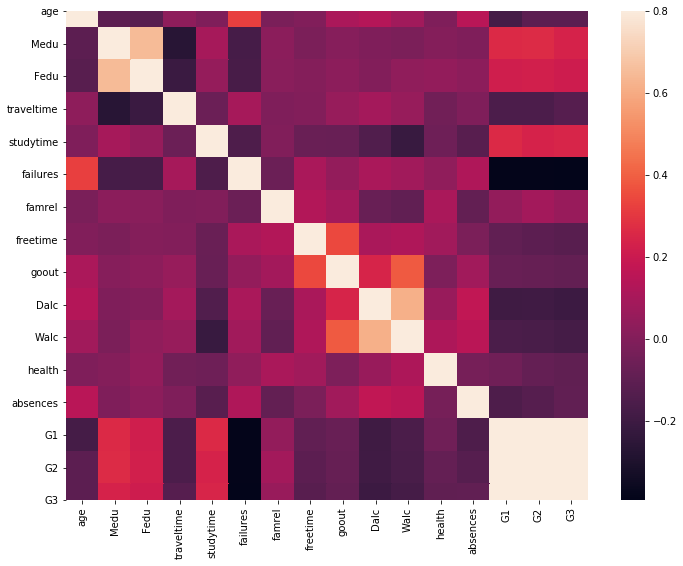

In [36]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

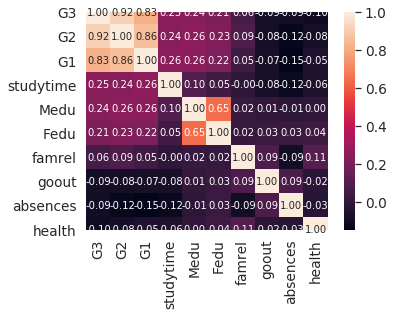

In [37]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'G3')['G3'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [38]:
corr = df_train.corr()
corr[['G3']].sort_values(by = 'G3',ascending = False).style.background_gradient()

,G3
G3,1
G2,0.918548
G1,0.826387
studytime,0.249789
Medu,0.240151
Fedu,0.2118
famrel,0.0633611
goout,-0.0876407
absences,-0.0913791
health,-0.0988512


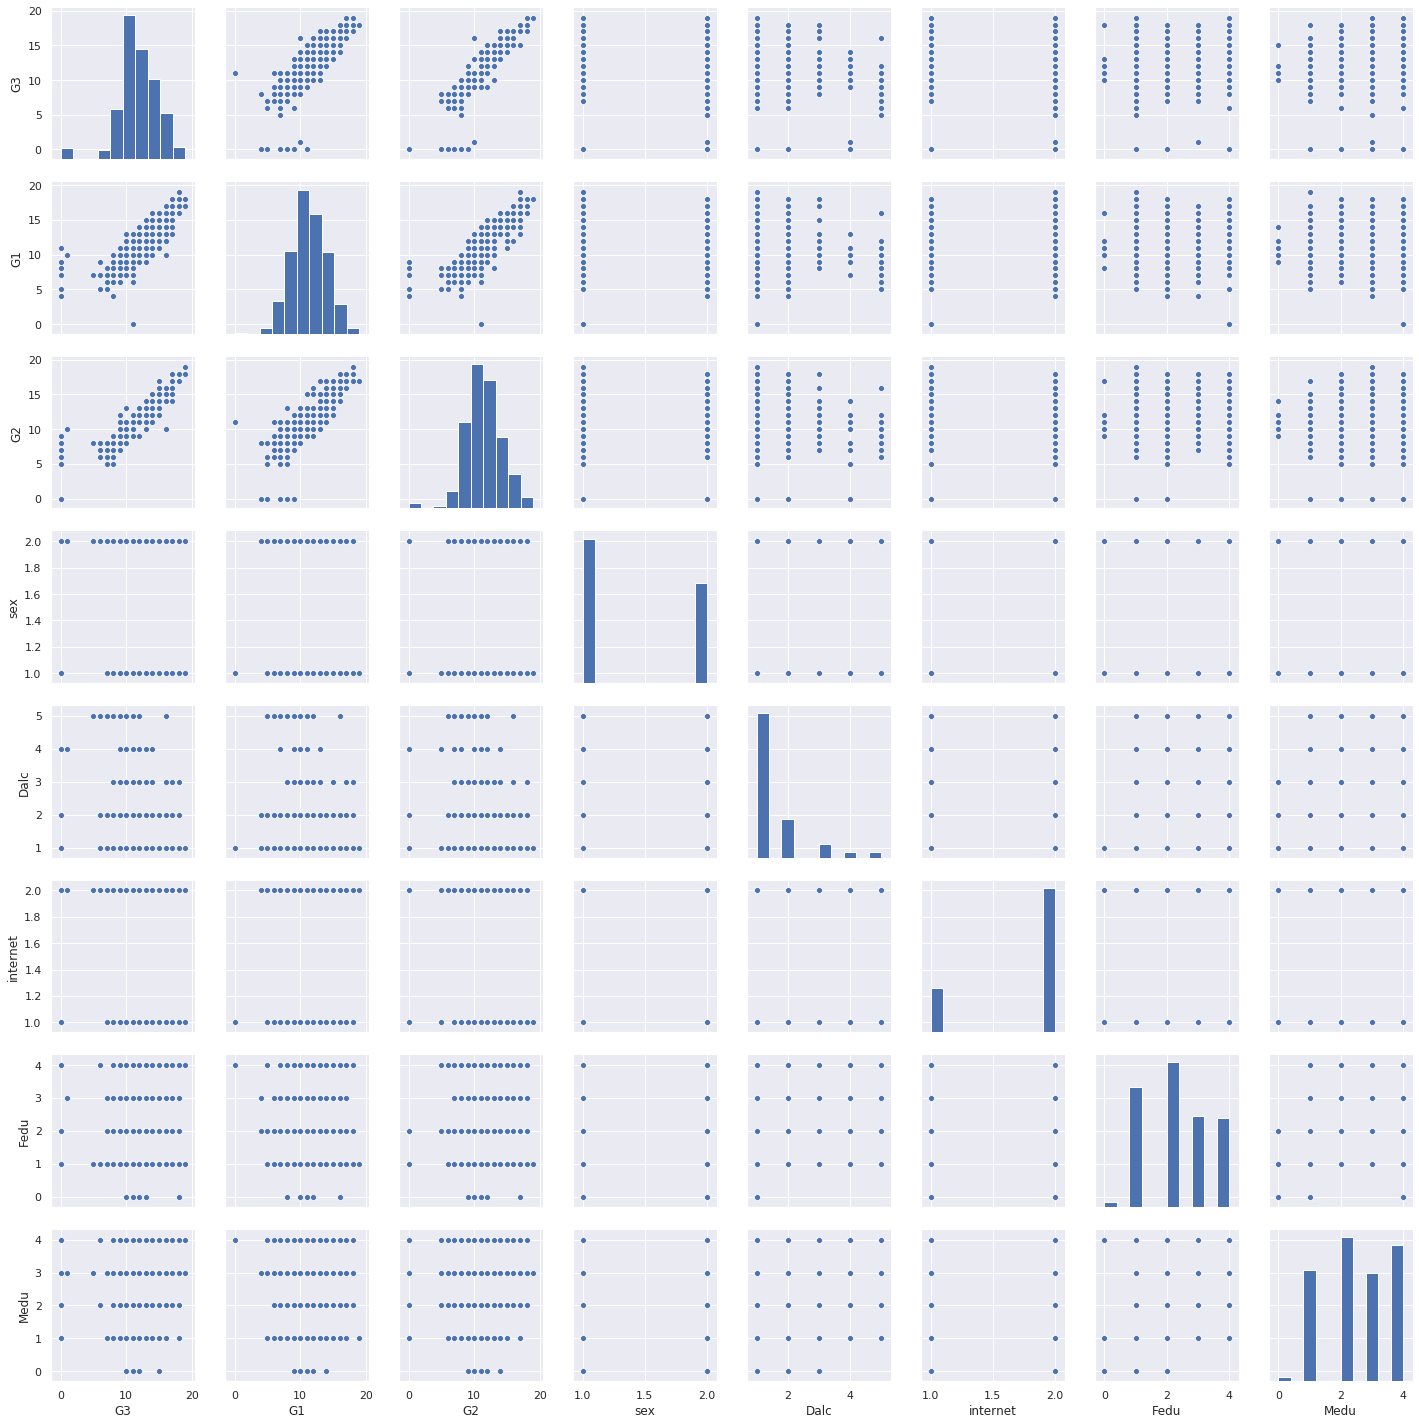

In [39]:
sns.set()
cols = ['G3', 'G1', 'G2','sex','Dalc','internet','Fedu','Medu']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [40]:
#Datos perdidos en el dataset
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
G3,0,0.0
schoolsup,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0
famsize,0,0.0
Pstatus,0,0.0
Medu,0,0.0
Fedu,0,0.0
Mjob,0,0.0


In [41]:
# Estandarización de datos:

G3_scaled = StandardScaler().fit_transform(df_train['G3'][:,np.newaxis]);
low_range = G3_scaled[G3_scaled[:,0].argsort()][:10]
high_range = G3_scaled[G3_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]
 [-3.68816474]]

Fuera de la distribución (por arriba):
[[1.88775612]
 [1.88775612]
 [1.88775612]
 [1.88775612]
 [1.88775612]
 [1.88775612]
 [1.88775612]
 [1.88775612]
 [2.1975295 ]
 [2.1975295 ]]


Los valores por debajo son similares y siguen una misma tendencia no muy alejada de 0.
Los valores por encima tambien son similares y no alejados de 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


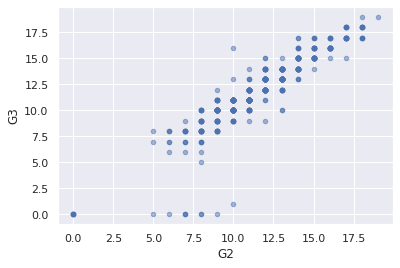

In [42]:
var = 'G2'
data = pd.concat([df_train['G3'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'G3', alpha = 0.5);

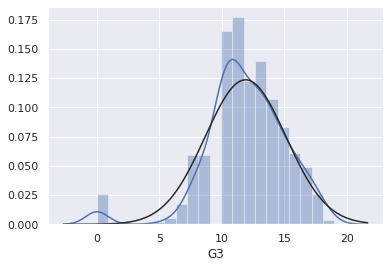

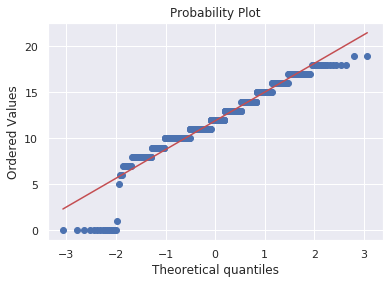

In [43]:
# Comprobacion de normalidad

sns.distplot(df_train['G3'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['G3'], plot = plt)

In [44]:
# Transformación de los datos:

df_train['G3'] = np.log(df_train['G3'])

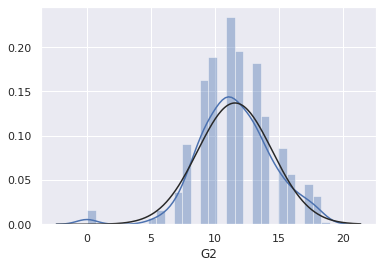

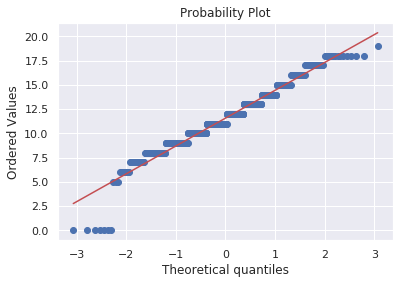

In [45]:

sns.distplot(df_train['G2'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['G2'], plot = plt)

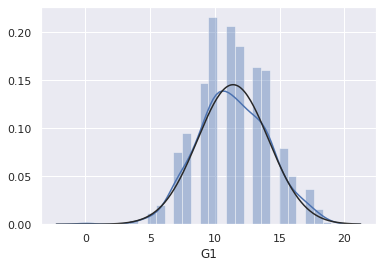

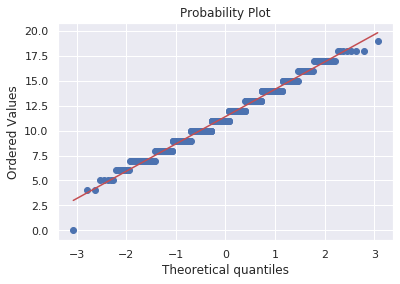

In [46]:

sns.distplot(df_train['G1'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['G1'], plot = plt)